In [1]:
from retinaface import RetinaFace
import os
import cv2
import numpy as np
import pickle 
from PIL import Image 

In [8]:
import matplotlib.pyplot as plt

In [94]:
faces = RetinaFace.detect_faces("E:\\my_projects\\ai_ml_project\\version_3\\test.jpeg")

In [95]:
faces

{'face_1': {'score': 0.9994305968284607,
  'facial_area': [74, 98, 197, 260],
  'landmarks': {'right_eye': [106.13885, 159.84465],
   'left_eye': [166.23299, 157.59865],
   'nose': [137.29742, 195.75952],
   'mouth_right': [112.78858, 219.59525],
   'mouth_left': [163.0316, 217.96835]}},
 'face_2': {'score': 0.9993302822113037,
  'facial_area': [840, 56, 998, 242],
  'landmarks': {'right_eye': [891.97144, 118.51878],
   'left_eye': [963.1119, 137.69408],
   'nose': [919.97046, 157.95001],
   'mouth_right': [876.3593, 183.65862],
   'mouth_left': [938.7699, 199.81218]}},
 'face_3': {'score': 0.9992363452911377,
  'facial_area': [1071, 152, 1223, 329],
  'landmarks': {'right_eye': [1103.4868, 225.69655],
   'left_eye': [1171.7306, 214.71193],
   'nose': [1137.3851, 253.23099],
   'mouth_right': [1116.0405, 283.2323],
   'mouth_left': [1179.6082, 274.59573]}},
 'face_4': {'score': 0.9930503368377686,
  'facial_area': [404, 67, 610, 362],
  'landmarks': {'right_eye': [461.2358, 186.3566],


In [96]:
faces.keys()

dict_keys(['face_1', 'face_2', 'face_3', 'face_4'])

In [97]:
image = cv2.imread("E:\\my_projects\\ai_ml_project\\version_3\\test.jpeg")

In [100]:
for key in faces.keys():
    face = faces[key]
    facial_area = face["facial_area"]
    cv2.rectangle(image, (facial_area[2], facial_area[3]), (facial_area[0], facial_area[1]), (255, 0, 0), 2)

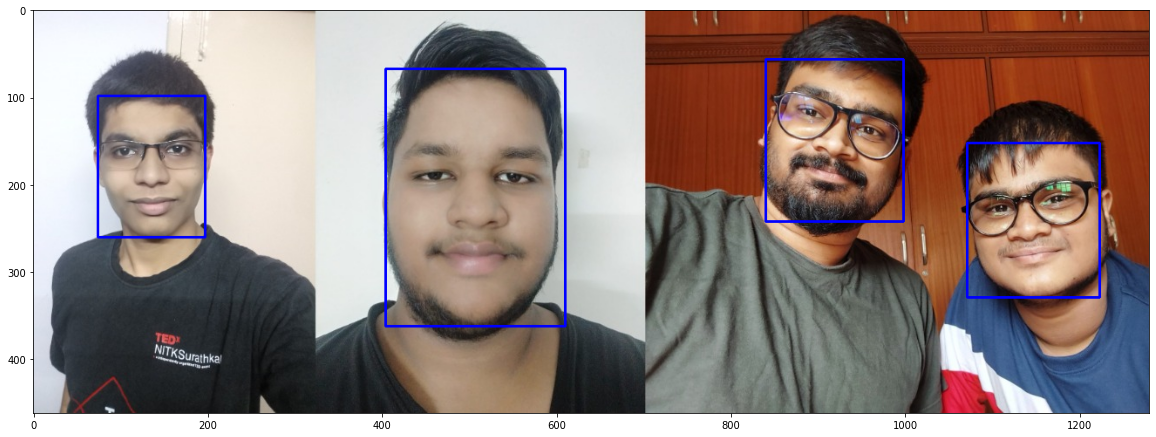

In [101]:
plt.figure(figsize=[20, 20])
plt.imshow(image[:, :, ::-1])
plt.show()

In [55]:
x = faces["face_4"]

In [56]:
x["facial_area"]

[305, 1313, 445, 1484]

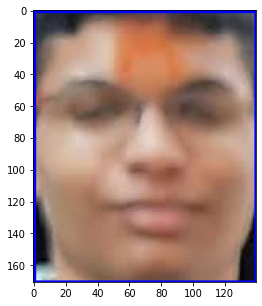

In [57]:
crop_image = image[x["facial_area"][1]:x["facial_area"][3], x["facial_area"][0]:x["facial_area"][2]]
plt.figure(figsize=[5, 5])
plt.imshow(crop_image[:, :, ::-1])
plt.show()

In [109]:
count = 0
for key in faces.keys():
    face = faces[key]
    facial_area = face["facial_area"]
    crop_image = image[facial_area[1]:facial_area[3], facial_area[0]:facial_area[2]]
    cv2.imwrite(f'croped_images\\image_{count}.png', crop_image)
    count += 1

In [73]:
import glob

In [241]:
remove_dir = glob.glob("E:\\my_projects\\ai_ml_project\\version_3\\croped_images\\*")

In [247]:
for f in remove_dir:
    f = f.split('\\')[-1].split('.')[0]
    print("removed " + f)
    #os.remove(f)

removed Ayush


In [110]:
import pandas as pd

In [147]:
data = {'name': ['Ayush', 'Bennett','Pranav']}

In [148]:
df = pd.DataFrame(data)

In [158]:
df

,name,attendance
0,Ayush,0
1,Bennett,0
2,Pranav,0


In [165]:
df.loc[df['name'] == 'Pranav'].index[0]

2

In [170]:
df['attendance'][2] = 1

In [171]:
df

,name,attendance
0,Ayush,0
1,Bennett,0
2,Pranav,1


In [179]:
name_list = ['Ayush', 'Bennett','Pranav']
df = pd.DataFrame({'name': name_list})
df['attendance'] = 0
identified_name = 'Ayush'
df['attendance'][df.loc[df['name'] == identified_name].index[0]] = 1

In [180]:
df

,name,attendance
0,Ayush,1
1,Bennett,0
2,Pranav,0


In [185]:
from deepface import DeepFace

In [258]:
img_path1 = "E:\\my_projects\\ai_ml_project\\version_3\\image_0.png"
img_path2 = "E:\\my_projects\\ai_ml_project\\version_3\\amma2.jpg"

In [259]:
DeepFace.verify(img1_path=img_path1, img2_path=img_path2, enforce_detection=False)['verified']

False

In [260]:
DeepFace.verify(img1_path=img_path1, img2_path=img_path2, model_name='ArcFace', enforce_detection=False)

{'verified': False,
 'distance': 0.9404564397241716,
 'threshold': 0.68,
 'model': 'ArcFace',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine'}

In [225]:
DeepFace.verify(img1_path=img_path1, img2_path=img_path2, model_name='Facenet', enforce_detection=False)

facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: C:\Users\prana\.deepface\weights\facenet_weights.h5
100%|█████████████████████████████████████████████████████████████████████████████| 92.2M/92.2M [00:45<00:00, 2.03MB/s]


{'verified': False,
 'distance': 0.7431911215380216,
 'threshold': 0.4,
 'model': 'Facenet',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine'}

In [228]:
DeepFace.verify(img1_path=img_path1, img2_path=img_path2, model_name='DeepFace', enforce_detection=False)

VGGFace2_DeepFace_weights_val-0.9034.h5 will be downloaded...


Downloading...
From: https://github.com/swghosh/DeepFace/releases/download/weights-vggface2-2d-aligned/VGGFace2_DeepFace_weights_val-0.9034.h5.zip
To: C:\Users\prana\.deepface\weights\VGGFace2_DeepFace_weights_val-0.9034.h5.zip
100%|███████████████████████████████████████████████████████████████████████████████| 511M/511M [04:16<00:00, 2.00MB/s]


{'verified': False,
 'distance': 0.37025797413478634,
 'threshold': 0.23,
 'model': 'DeepFace',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine'}

In [229]:
DeepFace.verify(img1_path=img_path1, img2_path=img_path2, model_name='OpenFace', enforce_detection=False)

openface_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/openface_weights.h5
To: C:\Users\prana\.deepface\weights\openface_weights.h5
100%|█████████████████████████████████████████████████████████████████████████████| 15.3M/15.3M [00:03<00:00, 4.70MB/s]


{'verified': False,
 'distance': 0.4261613671743171,
 'threshold': 0.1,
 'model': 'OpenFace',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine'}

In [222]:
?DeepFace.verify

In [193]:
img1 = DeepFace.detectFace(img_path1)
img2 = DeepFace.detectFace(img_path2)

In [251]:
faces = RetinaFace.detect_faces("E:\\my_projects\\ai_ml_project\\version_3\\amma2.jpg")
image = cv2.imread("E:\\my_projects\\ai_ml_project\\version_3\\amma2.jpg")
count = 0
for key in faces.keys():
    face = faces[key]
    facial_area = face["facial_area"]
    crop_image = image[facial_area[1]:facial_area[3], facial_area[0]:facial_area[2]]
    cv2.imwrite(f'croped_images\\image_{count}.png', crop_image)
    count += 1

In [271]:
image_path = "E:\\my_projects\\ai_ml_project\\version_3\\test.jpeg"
faces = RetinaFace.detect_faces(image_path)
image = cv2.imread(image_path)

count = 0
for key in faces.keys():
    face = faces[key]
    facial_area = face["facial_area"]
    crop_image = image[facial_area[1]:facial_area[3], facial_area[0]:facial_area[2]]
    cv2.imwrite(f'croped_images\\image_{count}.png', crop_image)
    count += 1

data_collected = glob.glob("E:\\my_projects\\ai_ml_project\\version_3\\croped_images\\*")
data_set = glob.glob("E:\\my_projects\\ai_ml_project\\version_3\\data_set\\*")

names = list()
for image_data in data_set:
    names.append(image_data.split('\\')[-1].split('.')[0])
    
df = pd.DataFrame({'name': names})
df['attendance'] = 0

for image_collected in data_collected:
    for image_data in data_set:
        isSame = DeepFace.verify(img1_path=image_collected, img2_path=image_data, enforce_detection=False)['verified']
        isSame_twice = DeepFace.verify(img1_path=image_collected, img2_path=image_data, model_name='ArcFace', enforce_detection=False)['verified']
        if isSame and isSame_twice:
            print(image_collected, image_data)
            name = image_data.split('\\')[-1].split('.')[0]
            df['attendance'][df.loc[df['name'] == name].index[0]] = 1
            
df.to_excel("attendance.xlsx", index=False)

E:\my_projects\ai_ml_project\version_3\croped_images\image_0.png E:\my_projects\ai_ml_project\version_3\data_set\Pranav.png
E:\my_projects\ai_ml_project\version_3\croped_images\image_3.png E:\my_projects\ai_ml_project\version_3\data_set\Ayush.png


ModuleNotFoundError: No module named 'openpyxl'

In [273]:
df.to_excel("attendance.xlsx") 

In [ ]:
f = f.split('\\')[-1].split('.')[0]